In [1]:
from __future__ import annotations


In [2]:
from config.dl_model_config import DLModelConfig

from ipsqt.prediction.dl.dl_predictor import DLClassifier as Predictor
from ipsqt.prediction.dl.models.mlp import MLPClassifier as Model
from ipsqt.strategies.predicted.momentum_reversal_uncert_strategy import (
    MomentumReversalUncertStrategy as Strategy,
)

from run import initialize

In [3]:
REBAL_FREQ = "ME"
RETRAIN_NUM_DAYS = 30
SAVE = True

In [4]:
preprocessor, runner = initialize()

model_config = DLModelConfig()
model_config.n_features = len(runner.available_features)
print(runner.available_features)
model_config.n_classes = 2
model_config.dropout = 0.2

# Define SVI resampling
model_config.n_resample_svi = 100

model_config.n_epochs = 10

predictor = Predictor(
    model_cls=Model,
    model_config=model_config,
    verbose=False,
)

strategy = Strategy(
    predictor=predictor,
    retrain_num_days=RETRAIN_NUM_DAYS,
)

strategy_name = strategy.__class__.__name__
model_name = predictor.model.__class__.__name__

Backtest on 1992-08-31 00:00:00 to 2024-05-31 00:00:00
Num Train Iterations: 365
Num OOS Daily Points: 365
['CAPE', 'STP', 'M2', '_OIL', 'lagged_MKT']


In [5]:
result = runner(
    feature_processor=preprocessor,
    strategy=strategy,
    hedger=None,
)

Computing Weights: 100%|██████████| 365/365 [00:48<00:00,  7.57it/s]


In [6]:
print(result)

StrategyStatistics:
* final_nav = 25.304594
* geom_avg_total_r = 0.102271
* geom_avg_xs_r = 0.081005
* std_xs_r = 0.194310
* min_xs_r = -0.194052
* max_xs_r = 0.356444
* skew = 0.665953
* kurtosis = 5.063160
* max_dd = -0.393572
* sharpe = 0.416883
* alpha_buy_hold = 0.009840
* tracking_error_buy_hold = 0.206699
* ir_buy_hold = 0.047603
* factor_loadings = {'MKT_Factor': 0.3878000508673742}
* alpha_benchmark = 0.050943
* alpha_benchmark_pvalue = 0.049711
* tracking_error_benchmark = 0.185078
* ir_benchmark = 0.275251
* ttest_pval = 0.357536
* levene_pval = 0.005037
* timing_ability_coef = 1.268101
* timing_ability_pval = 0.000000


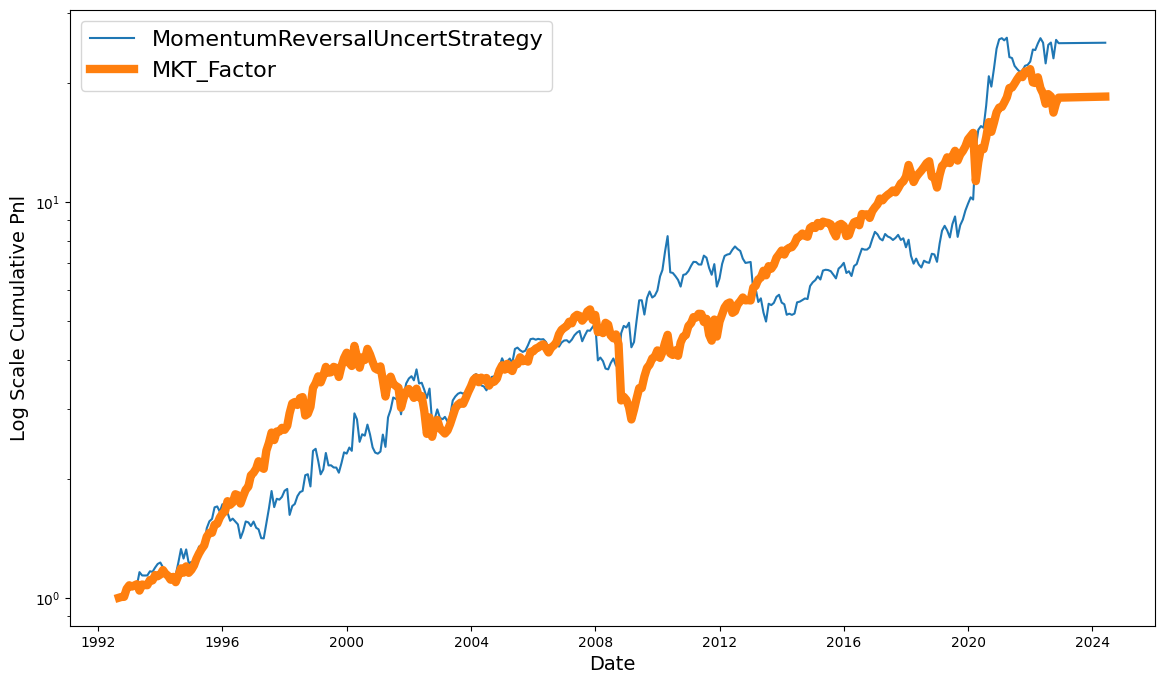

In [7]:
runner.plot_cumulative(
    strategy_name=strategy_name,
    include_factors=True,
)

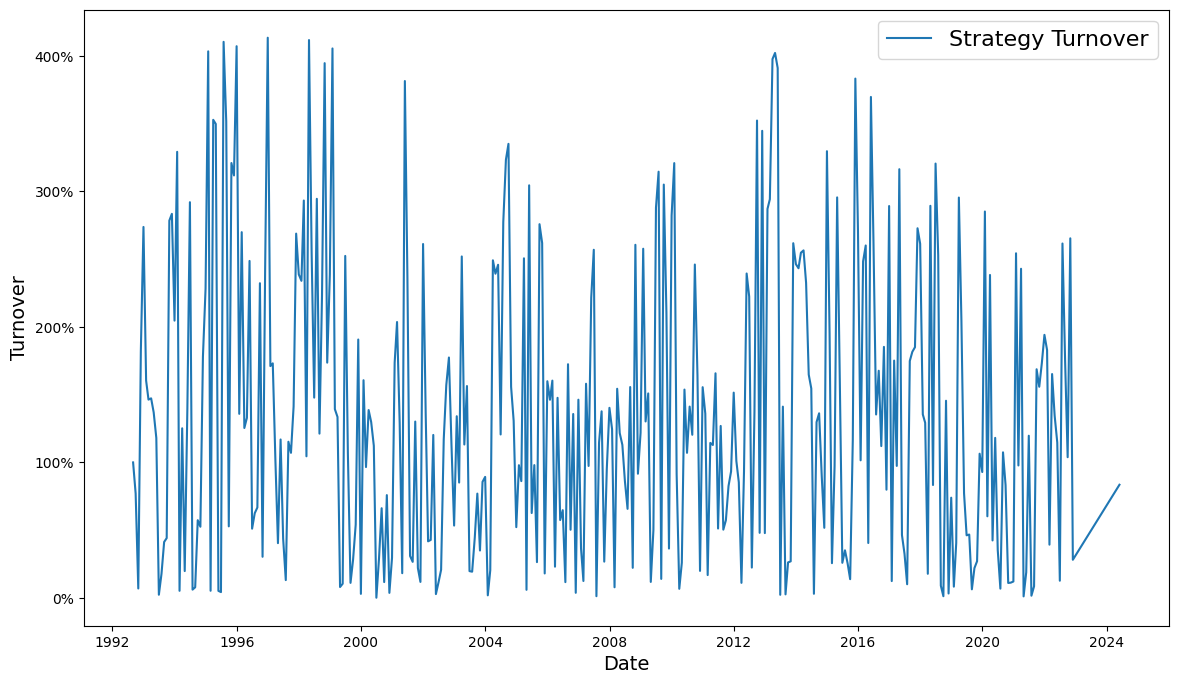

In [8]:
runner.plot_turnover()

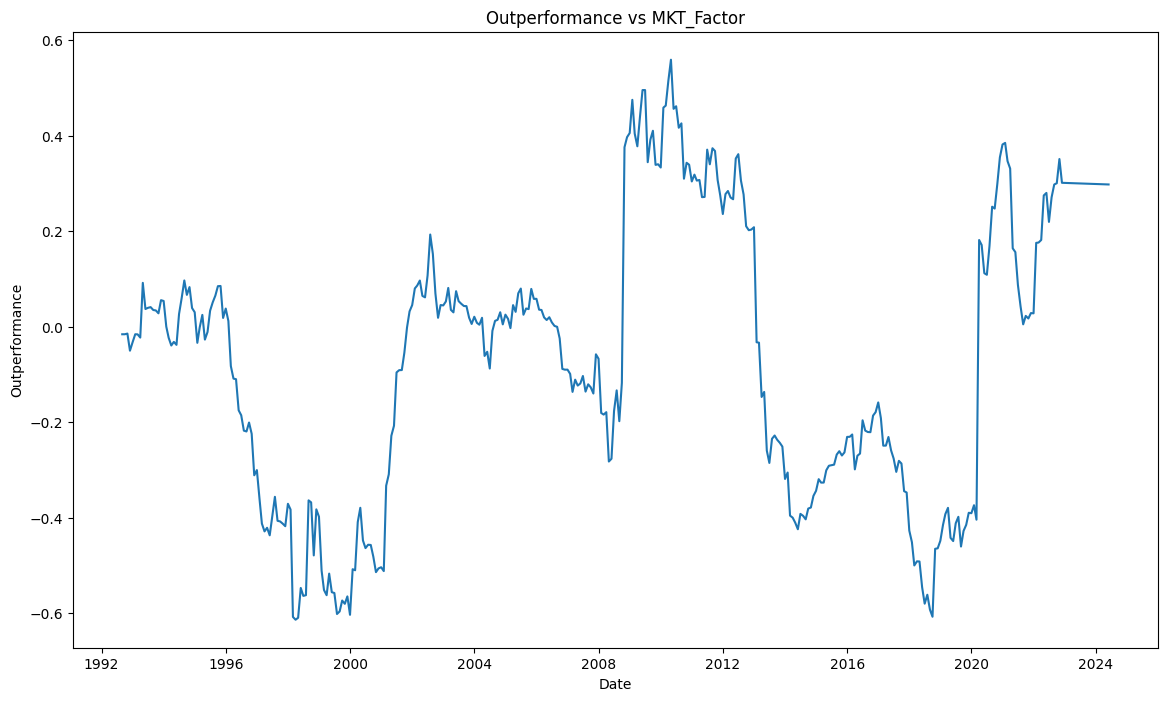

In [9]:
runner.plot_outperformance(mkt_only=True)

In [10]:
if SAVE:
    runner.save(f"{strategy_name}_" + model_name + f"_rebal{REBAL_FREQ}")

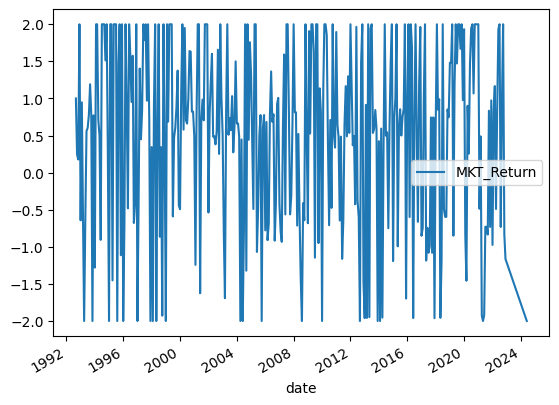

In [11]:
runner.strategy_weights.plot();